In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import polars as pl
import seaborn as sns

In [10]:
tWW_G_U = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/tWW-G-U.parquet")
tWW_G_U_f = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/tWW-G-U-filtered.parquet")
tWW_A_C = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/tWW-A-C.parquet")
tWW_A_C_f = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/tWW-A-C-filtered.parquet")
tWW_A_C_f.schema
cWW_A_U_f = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/cWW-A-U-filtered.parquet")
cWW_G_C_f = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/cWW-G-C-filtered.parquet")
cWW_G_U_f = pl.read_parquet("/home/exyi/mount/random_basepairsdatmos/tables/cWW-G-U-filtered.parquet")

<Axes: xlabel='C1_C1_distance', ylabel='C1_C1_total_angle'>

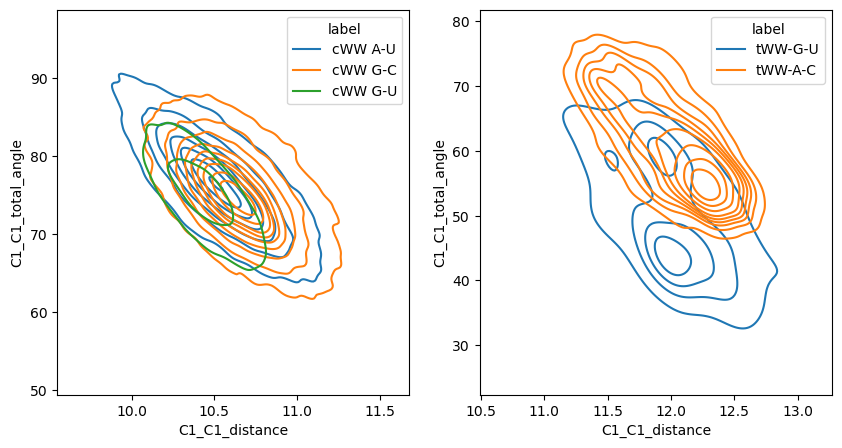

In [13]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

def clean(df: pl.DataFrame, cols = ["C1_C1_distance", "C1_C1_total_angle"], q=0.001):
    for col in cols:
        min, max = df.select(pl.quantile(col, q).alias("min"), pl.quantile(col, 1-q).alias("max"))[0]
        df = df.filter((pl.col(col) >= min) & (pl.col(col) <= max))
    return df

def scatter_df(df, label):
    return clean(df).select("C1_C1_distance", "C1_C1_total_angle", pl.lit(label).alias("label"))

sns.kdeplot(
    pl.concat([scatter_df(tWW_G_U, "tWW-G-U"), scatter_df(tWW_A_C, "tWW-A-C")]).to_pandas(), x="C1_C1_distance", y="C1_C1_total_angle", hue="label", ax=ax2)

sns.kdeplot(
    pl.concat([scatter_df(cWW_A_U_f, "cWW A-U"), scatter_df(cWW_G_C_f, "cWW G-C"), scatter_df(cWW_G_U_f, "cWW G-U")]).to_pandas(), x="C1_C1_distance", y="C1_C1_total_angle", hue="label", ax=ax1)

<Axes: xlabel='x1', ylabel='y1'>

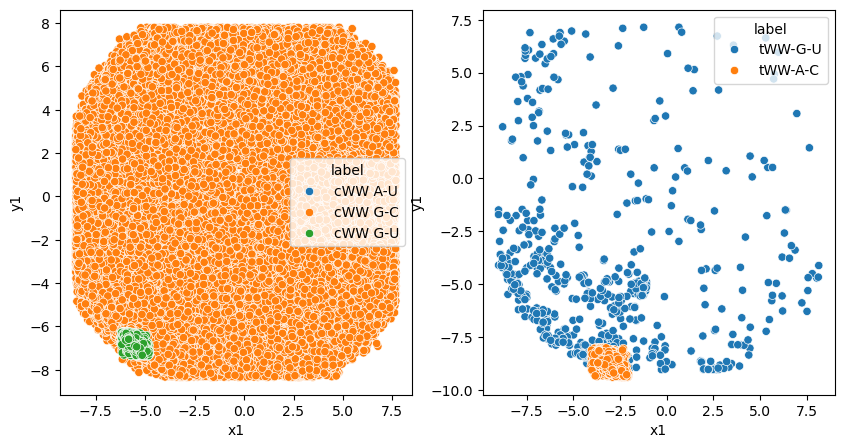

In [17]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

def scatter_df(df, label):
    return clean(df, ["x1", "y1"], 0.04).select("x1", "y1", pl.lit(label).alias("label"))

sns.scatterplot(
    pl.concat([scatter_df(tWW_G_U, "tWW-G-U"), scatter_df(tWW_A_C, "tWW-A-C")]).to_pandas(), x="x1", y="y1", hue="label", ax=ax2)

sns.scatterplot(
    pl.concat([scatter_df(cWW_A_U_f, "cWW A-U"), scatter_df(cWW_G_C_f, "cWW G-C"), scatter_df(cWW_G_U_f, "cWW G-U")]).to_pandas(), x="x1", y="y1", hue="label", ax=ax1)